# Math 381 HW 4
### Chongyi (Johnny) Xu, 1531273
### 10/29/2018

----

## Question 1

Load the data using “import numpy” and “A = numpy.loadtxt(’band.txt’)”. Spot
check at least the first 5 and the last 5 values to be sure you got it all right. Hint:
There should be 10 pairs shown here in your output

In [174]:
import numpy
A = numpy.loadtxt("band.txt")

In [3]:
A[0:5] # first 5 values

array([[-6047.92,  2672.62],
       [-5577.4 ,  2768.64],
       [-5198.07,  2978.71],
       [-8452.47,  3288.93],
       [-5618.84,  2065.25]])

In [4]:
A[-6:-1] # last 5 values

array([[-6068.67,  2926.89],
       [-8278.33,  2730.66],
       [-6193.72,  3106.52],
       [-5166.26,  2779.7 ],
       [-6279.39,  2235.23]])

## Question 2

Check the type of A and the length of A. Describe how this data type works. Look
it up online if you don’t know.

In [5]:
type(A)

numpy.ndarray

In [6]:
len(A)

128

## Question 3

Compute the length of the tour of the first 5 cities in the given order and then
returning to the start. Do the same for all cities in A in the given order.

In [73]:
def getEuclideanDistance(a):
    '''
    :type a: List[(int, int)]
    :rtype: int
    Returns the distance goes from start along the given order and get back to start
    '''
    s = 0
    s = sum([numpy.linalg.norm(a[i+1]-a[i]) for i in range(len(a)-1)])
    return s + numpy.linalg.norm(a[-1]-a[0])

In [74]:
getEuclideanDistance(A[0:5])

8013.188108661334

In [75]:
getEuclideanDistance(A)

173679.82712051686

## Question 4

Plot the tour visiting the first 5 cities in A in the given order. Then, use the plot
to find a shorter tour. What is the improved route and what is its total distance?


In [9]:
import matplotlib.pyplot as plt

Text(0.5,1,'The tour visiting the first 5 cities in A in the given order with distance=8013.188108661334')

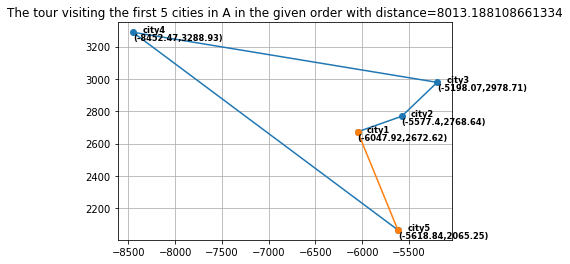

In [177]:
AA = A[0:5]
plt.figure()
plt.plot(A[0:5, 0], A[0:5, 1], "-o") # (x, y)
plt.plot([A[0, 0], A[4, 0]], [A[0, 1], A[4, 1]], "-o") # get back to start
plt.grid()
for j in range(5):
    plt.text(x=A[j, 0]+100, y=A[j, 1], s="city"+str(j+1), horizontalalignment="left", size="small", weight="semibold")
    plt.text(x=A[j, 0], y=A[j, 1]-50, s="("+str(A[j,0])+","+str(A[j,1])+")", horizontalalignment="left", 
             size="small", weight="semibold")
plt.title("The tour visiting the first 5 cities in A in the given order with distance=" + str(getEuclideanDistance(AA)))

To find a shorter route, we can simply look at the plot and discover that the route could be shorter if we decide to visit city4 at last since the distance between city4 and any one of the other cities is large.

Text(0.5,1,'The tour visiting the first 5 cities in A in the new order with distance=7488.379793515935')

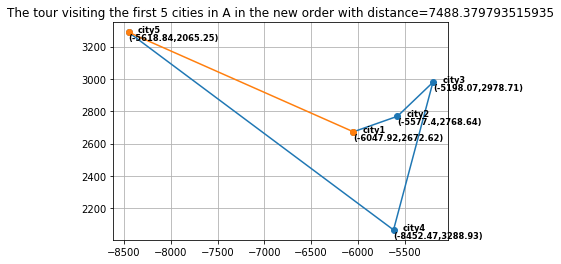

In [178]:
AA = AA[numpy.arange(len(AA))!=3]
AA = numpy.append(AA, [A[3]], axis=0)
plt.figure()
plt.plot(AA[0:5, 0], AA[0:5, 1], "-o") # (x, y)
plt.plot([AA[0, 0], AA[-1, 0]], [AA[0, 1], AA[-1, 1]], "-o") # get back to start
plt.grid()
for j in range(5):
    plt.text(x=AA[j, 0]+100, y=AA[j, 1], s="city"+str(j+1), horizontalalignment="left", size="small", weight="semibold")
    plt.text(x=AA[j, 0], y=AA[j, 1]-50, s="("+str(A[j,0])+","+str(A[j,1])+")", horizontalalignment="left", 
             size="small", weight="semibold")
plt.title("The tour visiting the first 5 cities in A in the new order with distance=" + str(getEuclideanDistance(AA)))

## Question 5

Plot the coordinates of all cities in A and use the plot to find a reasonably good
tour by eye. Plot the improved tour. What is the improved route and what is its
total distance?

Text(0.5,1,'Plot of the tour visiting the all cities in A in the given order with distance=173679.82712051686')

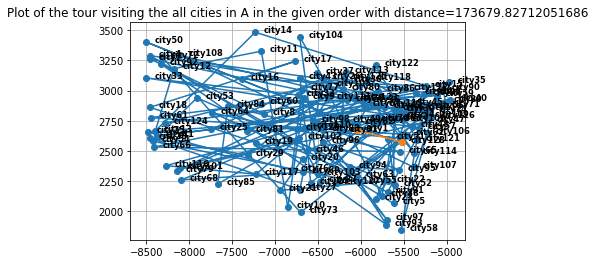

In [179]:
fig = plt.figure()
plt.plot(A[:, 0], A[:, 1], "-o") # (x, y)
plt.plot([A[0, 0], A[-1, 0]], [A[0, 1], A[-1, 1]], "-o") # get back to start
plt.grid()
for j in range(len(A)):
    plt.text(x=A[j, 0]+100, y=A[j, 1], s="city"+str(j+1), horizontalalignment="left", size="small", weight="semibold")
    #plt.text(x=A[j, 0], y=A[j, 1]-50, s="("+str(A[j,0])+","+str(A[j,1])+")", horizontalalignment="left", 
             #size="small", weight="semibold")
plt.title("Plot of the tour visiting the all cities in A in the given order with distance=" + str(getEuclideanDistance(A)))

With the given order, the tour route is obviously a chaos, so we would like to try to first visit all cities with $x \leq -7500$, then travels around within $-7500 < x \leq -6000$. Finally, we will travel around with $x > -6000$. Also, we will make the route goes down-up-down, which means we will travel cities with greater $y$ coornidates at first within the first region ($x\leq -7500$), then make the route with less $y$ first within second region ($-7500 < x \leq -6000$). And at last, we will travel greater $y$ first in the last region.

In [163]:
df_A = numpy.zeros(len(A), dtype={"names":["x", "y"], "formats":[float, float]})
df_A["x"] = A[:,0]
df_A["y"] = A[:,1]
# Region 1
df_A1 = numpy.sort(df_A[numpy.where(df_A["x"]<=-7500)], order="y")
df_A1 = [list(ele) for ele in df_A1]
# Region 2
df_A2 = numpy.sort(df_A[numpy.where(numpy.logical_and(df_A["x"]>-7500,df_A["x"]<=-6000))], order="y")
df_A2 = df_A2[::-1]
df_A2 = [list(ele) for ele in df_A2]
# Region 3
df_A3 = numpy.sort(df_A[numpy.where(df_A["x"]>-6000)], order="y")
df_A3 = [list(ele) for ele in df_A3]

newA = numpy.append(df_A1, df_A2, axis=0)
newA = numpy.append(newA, df_A3, axis=0)

Text(0.5,1,'Plot of the tour visiting the all cities in A in the new order')

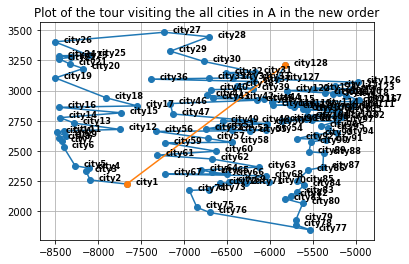

In [181]:
# Plot
fig = plt.figure()
plt.plot(newA[:, 0], newA[:, 1], "-o") # (x, y)
plt.plot([newA[0, 0], newA[-1, 0]], [newA[0, 1], newA[-1, 1]], "-o") # get back to start
plt.grid()
for j in range(len(newA)):
    plt.text(x=newA[j, 0]+100, y=newA[j, 1], s="city"+str(j+1), horizontalalignment="left", size="small", weight="semibold")
    #plt.text(x=A[j, 0], y=A[j, 1]-50, s="("+str(A[j,0])+","+str(A[j,1])+")", horizontalalignment="left", 
             #size="small", weight="semibold")
plt.title("Plot of the tour visiting the all cities in A in the new order")

This time, the route looks much more reasonable. And we would like to know its total distance.

In [166]:
getEuclideanDistance(newA)

48565.84999837654

Not suprising, the total distance becomes much more better rather than the distance calculated from the given order.

## Question 6

Write a function which solves the traveling salesman problem for n cities by checking
all possible tours and finding the shortest possible distance. Use this function
to solve the TSP on the first 5 cities in A

In [333]:
import itertools as itr
def solveTSP(a):
    '''
    :type a: List[(int, int)]
    :rtype: [List[(int, int)], int]
    Returns the best route goes from start along the given order and get back to start
    '''
    labels = {} # Store the city names to intepreate the result
    for i in range(len(a)):
        labels[str(a[i])] = "city" + str(i+1)
    all_routes = itr.permutations(a)
    best = [[], float("inf")]
    for route in all_routes:
        route = numpy.array(route)
        distance = getEuclideanDistance(route)
        if best[1] > distance:
            best = [[labels[str(position)] for position in route], distance]
    return best

In [335]:
solveTSP(A[0:5])

[['city1', 'city2', 'city3', 'city5', 'city4'], 7488.379793515935]


From the result, we can see that the best route is city2 -> city2 -> city3 -> city5 -> city4 with a distance of 7488.38

## Question 7

 How efficient is your routine in Problem 6? Use the `%time` function to check the
speed of the calculation for n cities for $n = 8, 9, 10, 11, 12, \dots$ until it takes more
than 10 mins and then stop it using a kernel interrupt. Show the results of the
timing. Show your optimal tour and total distance for each case.

In [408]:
import time
runtime = 0
start = time.time()
n = 10
solveTSP(A[0:n])
time.time() - start
#while runtime < 10*60:
#    start = time.time()
#    print(solveTSP(A[0:n]))
#    runtime = time.time() - start
#    print("With n = " + str(n) + ", the runtime is " + str(runtime) + "s.")
#    n += 1

KeyboardInterrupt: 

## Question 8

Find the shortest complete tour you can for all of the 128 cities. You can use any
method you can program in python. For example, try a branch and bound function
or try lots of random permutations (check out the numpy.random.permutation
command) or by using Gurobi. This problem will be graded according to how
close to optimal your tour is. Interpret your results for the band so they know
their tour schedule. Write one paragraph explaining the route you recommend and
why you believe this would be best for them.


-- I am going to use the same method as I used in Question 5 but now with more regions from $min(A(x))$ to $max(A(x))$. I will test the number of regions from 1 to 50. And I will try to start at any of one regions.

In [432]:
df_A = numpy.zeros(len(A), dtype={"names":["x", "y"], "formats":[float, float]})
df_A["x"] = A[:,0]
df_A["y"] = A[:,1]
best = [[], float("inf"), 0]
for N in range(1, 50):
    diff = (max(A[:,0]) - min(A[:,0])) / N
    boundary = [[min(A[:,0]) + i*diff, min(A[:,0]) + (i+1)*diff] for i in range(N)]
    for k in range(N):
        newA = []
        for n in range(k, N):
            region = df_A[numpy.where(numpy.logical_and(df_A["x"]>=boundary[n][0],df_A["x"]<=boundary[n][1]))]
            if len(region) != 0:
                df_AA = numpy.sort(region, order="y")
                if n % 2 == 1:
                    df_AA = df_AA[::-1]
                df_AA = [list(ele) for ele in df_AA]
                if len(newA) == 0:
                    newA = numpy.ndarray(shape=[len(df_AA),2], buffer=numpy.array(df_AA))
                else:
                    newA = numpy.append(newA, df_AA, axis=0)
        for n in range(k):
            region = df_A[numpy.where(numpy.logical_and(df_A["x"]>=boundary[n][0],df_A["x"]<=boundary[n][1]))]
            if len(region) != 0:
                df_AA = numpy.sort(region, order="y")
                if n % 2 == 1:
                    df_AA = df_AA[::-1]
                df_AA = [list(ele) for ele in df_AA]
                if len(newA) == 0:
                    newA = numpy.ndarray(shape=[len(df_AA),2], buffer=numpy.array(df_AA))
                else:
                    newA = numpy.append(newA, df_AA, axis=0)
        d = getEuclideanDistance(newA)
        if d < best[1]:
            best = [newA, d, N]

Text(0.5,1,'Plot of the tour visiting the all cities in A using my algorithm with a distance = 25144.849136271674')

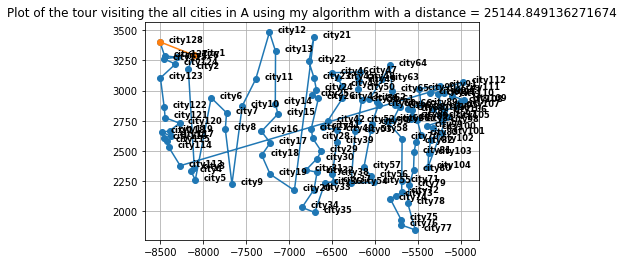

In [433]:
# Plot
newA = best[0]
fig = plt.figure()
plt.plot(newA[:, 0], newA[:, 1], "-o") # (x, y)
plt.plot([newA[0, 0], newA[-1, 0]], [newA[0, 1], newA[-1, 1]], "-o") # get back to start
plt.grid()
for j in range(len(newA)):
    plt.text(x=newA[j, 0]+100, y=newA[j, 1], s="city"+str(j+1), horizontalalignment="left", size="small", weight="semibold")
    #plt.text(x=A[j, 0], y=A[j, 1]-50, s="("+str(A[j,0])+","+str(A[j,1])+")", horizontalalignment="left", 
             #size="small", weight="semibold")
plt.title("Plot of the tour visiting the all cities in A using my algorithm with a distance = " + str(best[1]))

In [434]:
print("The according number of regions is "+ str(best[2]))

The according number of regions is 15


As the result, the best distance I found is 25144.849 and the number of regions I used is 15. The route is the following:

In [435]:
for coord in best[0]:print(str(coord) + "->")
print(best[0][0])

[-8112.52  3293.77]->
[-8176.09  3183.22]->
[-8105.59  2356.85]->
[-8144.31  2332.65]->
[-8094.56  2260.1 ]->
[-7909.38  2940.71]->
[-7730.4   2816.32]->
[-7744.91  2678.84]->
[-7667.55  2226.26]->
[-7547.32  2873.69]->
[-7390.45  3095.47]->
[-7230.86  3483.78]->
[-7159.69  3326.96]->
[-7162.46  2893.02]->
[-7132.05  2806.65]->
[-7324.14  2662.24]->
[-7221.19  2568.27]->
[-7320.67  2465.33]->
[-7222.55  2307.8 ]->
[-6939.97  2173.73]->
[-6712.64  3446.49]->
[-6772.07  3241.95]->
[-6709.88  3102.4 ]->
[-6683.62  3008.43]->
[-6729.21  2962.82]->
[-6660.11  2935.87]->
[-6744.43  2683.68]->
[-6725.75  2604.2 ]->
[-6626.97  2498.48]->
[-6680.17  2434.22]->
[-6805.21  2342.34]->
[-6675.33  2324.36]->
[-6711.93  2179.95]->
[-6850.92  2032.79]->
[-6702.97  1990.63]->
[-6584.82  2235.23]->
[-6477.72  2246.28]->
[-6498.45  2309.87]->
[-6445.93  2571.74]->
[-6441.79  2674.67]->
[-6610.36  2698.17]->
[-6553.01  2747.93]->
[-6380.27  2936.57]->
[-6388.57  3041.59]->
[-6432.79  3105.85]->
[-6506.72 

## Question 9

Math381.com has been asked to work with a manager in charge of toll
booth scheduling. Your task is to write up a complete description of both the real
world problem and your predicted solution to the Toll Booth Scheduling Problem
in Model 3. Your description should be aimed at the manager who wants to see all
of your work justified carefully, on par with a mathematical proof. Use the 4-stage
modeling process described in class as an outline for your write-up. The target
length is about 1 page of text.


#### Translation

Set $x_i = $ #collectors starts working at time i$\in{1,\dots,24}$ where time$i$ represents starts working at 1 a.m.

The object function is considered to be 

$$\text{Minimize}(\sum_i x_i)$$

Given each collector could only continuously work 4 hours and we also need to meet specific requirements of workers needed during certain time periods. 

For example, during 12 a.m. to 6 p.m., there are 2 collectors needed for this time period. Due to the 4-hour restriction, only the collectors who start after 9 p.m. (10 p.m., 11 p.m., 12 a.m., 1 a.m.) could work during 12 a.m. to 6 a.m.. Also, only the collectors who start before 5 a.m. could work during the time period. In such way, we could have our constraints with the given table as following:

$$x_{21} + x_{22} + x_{23} + x_{24} + x_{1} + x_{2} + \dots + x_{5} \geq 2\text{ (12 a.m. to 6 a.m.)}$$

$$x_{3} + \dots + x_{9} \geq 8\text{ (6 a.m. to 10 a.m.)}$$

$$x_{7} + \dots + x_{11} \geq 4\text{ (10 a.m. to 12 p.m.)}$$

$$x_{9} + \dots + x_{15} \geq 3\text{ (12 p.m. to 4 p.m.)}$$

$$x_{13} + \dots + x_{17} \geq 6\text{ (4 p.m. to 6 p.m.)}$$

$$x_{15} + \dots + x_{21} \geq 5\text{ (6 p.m. to 10 p.m.)}$$

$$x_{19} + \dots + x_{23} \geq 3\text{ (10 p.m. to 12 a.m.)}$$

$$x_i \in \mathbb{I\{+\}}$$

#### Prediction

In [437]:
from gurobipy import *

ModuleNotFoundError: No module named 'gurobipy'